In [ ]:
from google.colab import files
import cv2
import numpy as np
import os
import glob

In [1]:
# Install YOLOv5 and dependencies
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.10 MiB | 12.08 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import torch

# Load YOLOv5 model correctly
model = torch.hub.load("ultralytics/yolov5", "yolov5s", pretrained=True)

# Check if model loads properly
model.conf = 0.4
print("YOLOv5 model loaded successfully!")


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-3-6 Python-3.11.11 torch-2.5.1+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 184MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


YOLOv5 model loaded successfully!


Saving beach.jpg to beach.jpg
✅ Image Loaded Successfully: beach.jpg


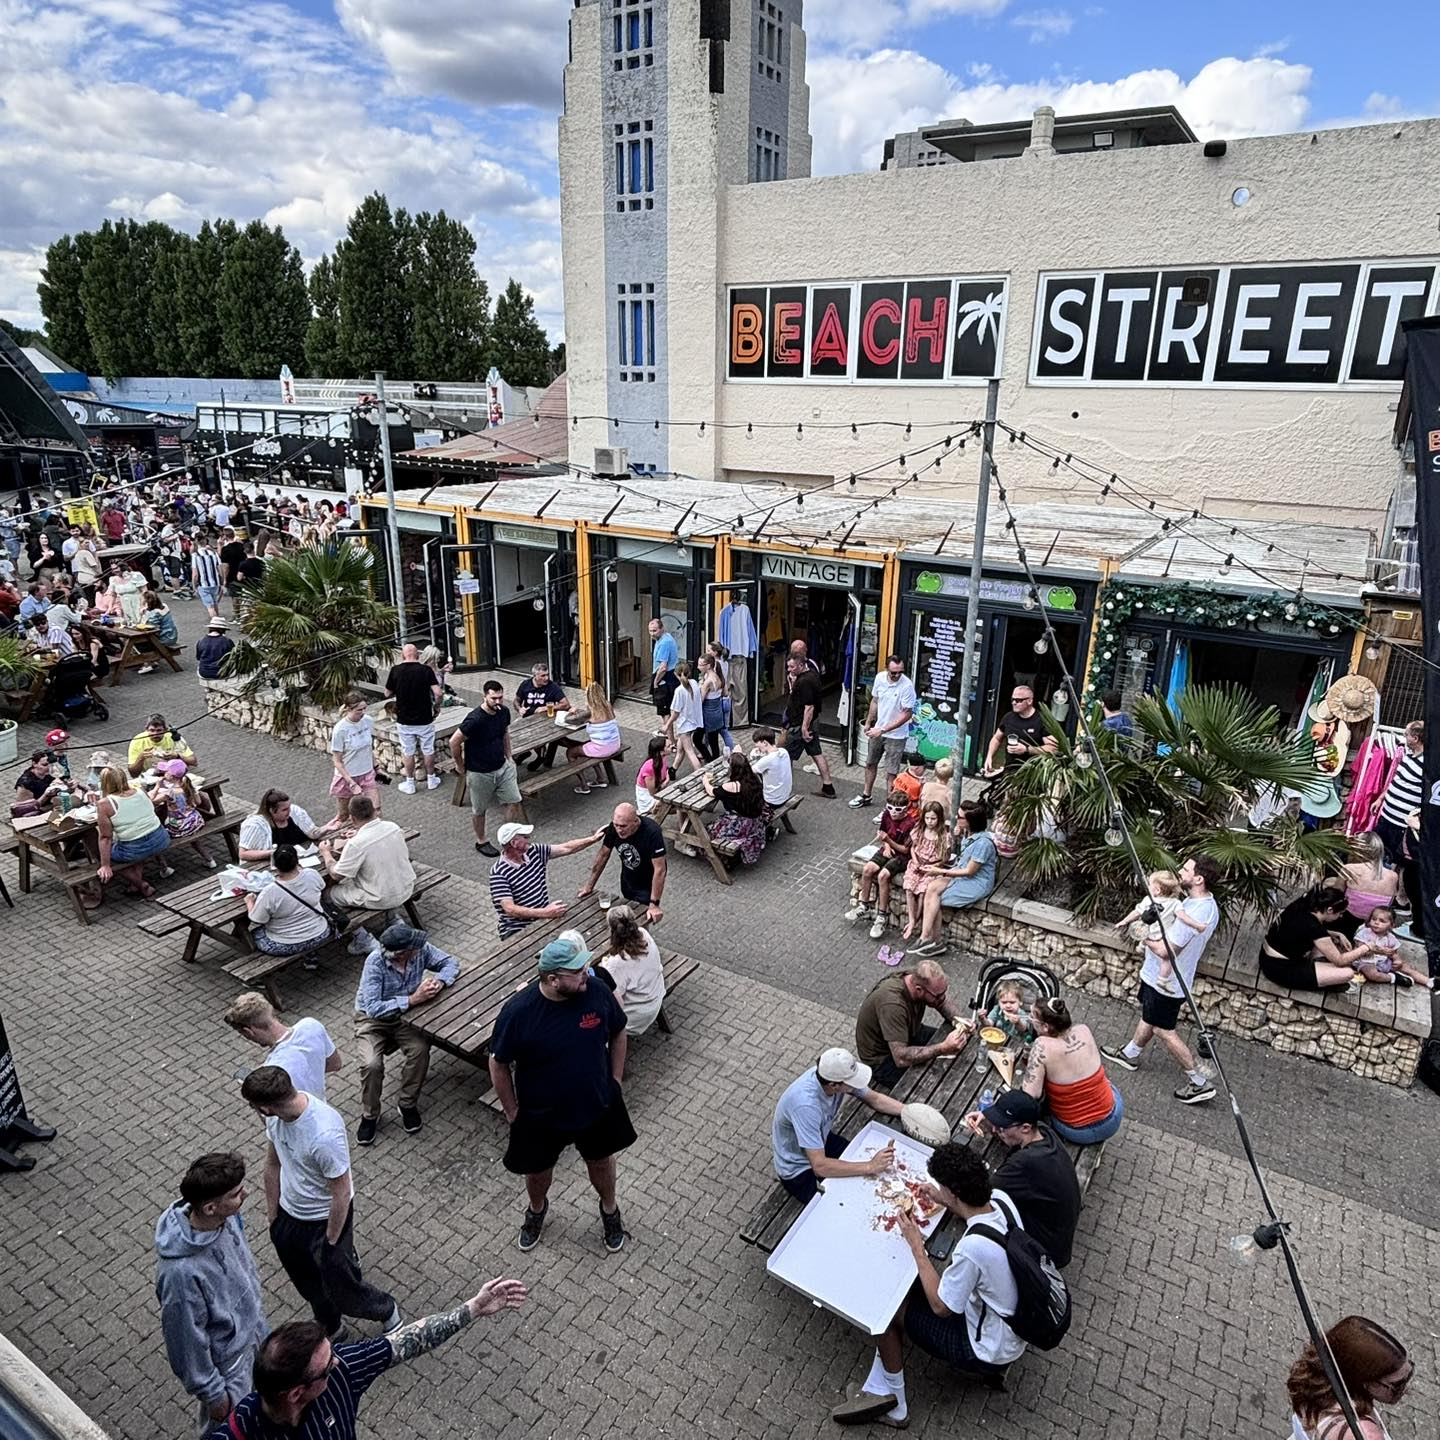

In [21]:



uploaded = files.upload()


image_files = glob.glob("*.jpeg") + glob.glob("*.jpg") + glob.glob("*.png")
image_path = max(image_files, key=os.path.getctime)

# Read the image
image = cv2.imread(image_path)

# Debugging: Check if the image was read correctly
if image is None:
    print("⚠️ Error: Image could not be loaded. Check the filename or file format.")
else:
    print(f"✅ Image Loaded Successfully: {image_path}")

    # Convert BGR to RGB for correct color display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show image using OpenCV (alternative method)
    from IPython.display import display
    from PIL import Image

    display(Image.fromarray(image))


In [22]:
import torch

# Load pre-trained YOLOv5 model
model = torch.hub.load("ultralytics/yolov5", "yolov5s", pretrained=True)

# Set confidence threshold (optional)
model.conf = 0.4

print("✅ YOLOv5 Model Loaded Successfully!")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-6 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ YOLOv5 Model Loaded Successfully!


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Run YOLOv5 on the uploaded image
results = model(image_path)

# Extract the detected image
detected_img = results.render()[0]  # Get the processed image
detected_img = np.array(detected_img)  # Convert to NumPy array

# Display the detected image
plt.figure(figsize=(8,6))
plt.imshow(detected_img)
plt.axis("off")
plt.title("Detected Objects")
plt.show()


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [24]:
from google.colab import files

# Save detected image
output_path = "detected_objects.jpg"
cv2.imwrite(output_path, cv2.cvtColor(detected_img, cv2.COLOR_RGB2BGR))  # Convert to BGR before saving

# Download the detected image
files.download(output_path)
print("✅ Processed image saved and ready for download!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Processed image saved and ready for download!
